#ECE-GY 6143 | Introduction to Machine Learning

#Topic: Zero-shot Text Classification

**Name:** Evan Hetland | Sagar Patel

**NETID:** eh2820 | sp5894

## **Natural Language Processing**

Natural language processing is a very exciting field right now. In recent years, the community has begun to figure out some pretty effective methods of learning from the enormous amounts of unlabeled data available on the internet. The success of transfer learning from unsupervised models has allowed us to surpass virtually all existing benchmarks on downstream supervised learning tasks. As we continue to develop new model architectures and unsupervised learning objectives, "state of the art" continues to be a rapidly moving target for many tasks where large amounts of labeled data are available.

One major advantage as models continue to grow is that we see a very slow decrease in the reliance on large amounts of annotated data for downstream tasks. This week the team at Open AI released a preprint describing their largest model yet, GPT-3, with 175 billion parameters. The paper is entitled, ["Language Models are Few-Shot Learners"](https://arxiv.org/abs/2005.14165), and shows that extremely large language models can perform competitively on downstream tasks with far less task-specific data than would be required by smaller models.

![gpt3 triviahq performance](https://joeddav.github.io/blog/images/zsl/gpt3_triviahq.png "GPT-3 few-shot performance as # of parameters grows")

However, models of this size remain impractical for real-world use. For instance, the largest version of GPT-3 must be partitioned across dozens of GPUs to even fit in memory. In many real-world settings, annotated data is either scarse or unavailable entirely. Models much smaller than GPT-3 such as BERT have still been shown to encode a tremendous amount of information in their weights ([Petroni et al. 2019](https://arxiv.org/abs/1909.01066)). It seems like if we were smart about it, we would be able to figure out some techniques for applying these models to downstream tasks in a way that takes advantage of this latent information without the need for so much task-specific annotated data.

## What is Zero-Shot Learning?

Zero-Shot learning method aims to solve a task without receiving any example of that task at training phase. The task of recognizing an object from a given image where there weren’t any example images of that object during training phase can be considered as an example of Zero-Shot Learning task. Actually, it simply allows us to recognize objects we have not seen before.

A well-known example of this is in the [GPT-2](https://www.semanticscholar.org/paper/Language-Models-are-Unsupervised-Multitask-Learners-Radford-Wu/9405cc0d6169988371b2755e573cc28650d14dfe?p2df) paper where the authors evaluate a language model on downstream tasks like machine translation without fine-tuning on these tasks directly.

### A Latent Embedding Approach

A common approach to zero shot learning in the computer vision setting is to use an existing featurizer to embed an image and any possible class names into their corresponding latent representations (e.g. [Socher et al. 2013](https://arxiv.org/abs/1301.3666)). They can then take some training set and use only a subset of the available labels to learn a linear projection to align the image and label embeddings. At test time, this framework allows one to embed any label (seen or unseen) and any image into the same latent space and measure their distance.

## Why do we need Zero-shot Learning?

In conventional object recognition process, it is necessary to determine a certain number of object classes in order to be able to do object recognition with high success rate. It is also necessary to collect as many sample images as possible for selected object classes. Of course, these sample images should contain objects taken from diverse angles in various contexts/environments in order to be comprehensive. Although there exists lots of object classes that we can effortlessly gather sample images of, there also exists cases that we are not always so lucky.

Imagine that we want to recognize animals that are on the edge of extinction or live in extreme environments (in the depths of the ocean/jungle or hard to reach mountain peaks) that humans are not able to visit whenever they wish. It is not easy to collect sample images of these sort of animals. Even if you would achieve to collect enough images, remember images should not be similar and they should be as unique as possible - You need to make a lot of effort to achieve that.

![](https://miro.medium.com/max/1120/1*2y5eABab6WkfPnKQTvab3w.jpeg)

    This animal (Ili Pika) was seen a few summers ago, in China

In addition to the difficulty of recognizing different object classes with a limited number of images, labeling for some object classes is not as easy as ordinary people can do. In some cases, labeling can only be done after the subject is truly mastered or in the presence of an expert. Fine grained object recognition tasks like recognition of fish species or tree species can be considered as examples of labelling under the supervision of an expert. An ordinary person will call/label all the tree she/he is viewed as tree or all the fish she/he is viewed as fish. These are obviously true answers but imagine that you want to train a network in order to recognize tree or fish species. In that case, all aforementioned true answers are useless and you need an expert to help you with labelling task. Again, you need to make a lot of effort to achieve that.

Now that after mentioning what Zero-Shot learning is, let’s implement a Zero-Shot learning model step by step. But before we do that, let’s elaborate our approach.

## The Hugging Face 🤗 Model

Github: https://github.com/huggingface

Medium: https://medium.com/huggingface

Web: https://huggingface.co/

Hugging Face is an open-source provider of NLP technologies.

Hugging Face has created multiple repositiories for Natural Language Processing and we will be using the *Transformers* repository from Github. 

The repository is available [here](https://github.com/huggingface/transformers)

`deepset/sentence_bert` which is the smallest version of the S-BERT model could also be used. However, our experiments use larger models which are currently available only in the `sentence-transformers` [Github Repository](https://github.com/UKPLab/sentence-transformers).

### transformers

Transformers provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation, etc in 100+ languages. It's aim is to make cutting-edge NLP easier to use for everyone.

Transformers is backed by the two most popular deep learning libraries, PyTorch and TensorFlow, with a seamless integration between them, allowing us to train your models with one then load it for inference with the other.

---

#### Why do we use transformers?

1. Easy-to-use state-of-the-art models

2. Lower compute costs, smaller carbon footprint

3. Choose the right framework for every part of a model's lifetime

4. Easily customize a model or an example to your needs

## Code for Zero-Shot Text Classification

### Installing transformers

Transformers can be installed by a single pip command as mentioned.

In [1]:
!pip install transformers==3.1.0

     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 890kB 17.2MB/s 
     |████████████████████████████████| 1.1MB 13.8MB/s 
     |████████████████████████████████| 3.0MB 28.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=266b4d8dde25fab95145dcfb7cf157bf828521381a59e3bea23b91cac7696666
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


To immediately use a model on a given text, we can install the `pipeline` API. 

Pipelines group together a pretrained model with the preprocessing that was used during that model training.

In [2]:
from transformers import pipeline
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

The variable `classifier` is used as a variable to store the downloads and caches from the pre-trained model `zero-shot classification`.

In order to use the GPU capabilities, we can alternatively use -

`classifier = pipeline("zero-shot-classification", device=0)`

In [4]:
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This pipeline can be used by passing in a sequence and a list of "candidate" labels. The pipeline assumes by default that only one of the candidate labels is true, returning a list of scores for each label which add up to 1.

### Classifiers

#### **Single-Class Classifier**

In this example, we take an input statement (stored in `sequence`) and assign a few random labels on our own and store them in the variable `candidate_labels`

The label with the highest score will be on top. Meanwhile, the other classes will have a score that's almost zero.

> Note: This single-class classifier will identify only one class. However, the other classes will not have a score of 0 as the sum of the scores of all classes combined needs to be 1 (as they are dependant values).

Who are you voting for in 2020?


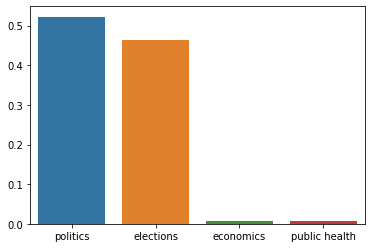

In [5]:
sequence = "Who are you voting for in 2020?"
candidate_labels = ["politics", "public health", "economics", "elections"]

result = classifier(sequence, candidate_labels)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

#### **Multi-Class Classifier**

Now, in order to detect multiple classes at once, we use the multi-class classifier.

To do multi-class classification, simply pass `multi_class=True`. The scores will be independent, but each will fall between 0 and 1.

More than 200,000 people dead because of this Pandemic and the nation's leaders did not do anything


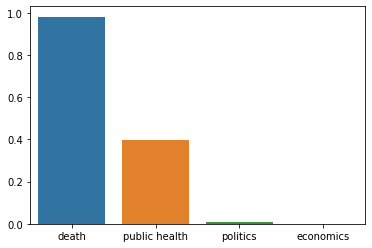

In [6]:
sequence = "More than 200,000 people dead because of this Pandemic and the nation's leaders did not do anything"
candidate_labels = ["politics", "public health", "economics", "death"]

result = classifier(sequence, candidate_labels, multi_class=True)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

#### **Sentiment Classification**

Sentiment classification is defined as the process of identifying opinions in text and labeling them as positive, negative, or neutral, based on the emotions expressed within them.

We can identify the sentiment using three techniques -

1. Rule-Based Systems

> This approach applies a series of hand-crafted rules to establish a pattern for each tag. For sentiment classification problems, rule-based systems rely on a lexicon, which is a list of positive terms (like good, beautiful, useful, interesting, etc) and negative terms (such as bad, ugly, uncomfortable, frustrated, etc).

2. Automated Systems (Based on Machine Learning)

> Automated systems use machine learning algorithms that learn to predict sentiment from past observations. For this AI approach, you need an example dataset (similar to the data you’d like to analyze) along with their corresponding tags. This is called training data. During the training process, the model transforms text data into vectors (an array of numbers with encoded information, basically, something that machines can understand) and identifies a pattern to associate each vector with one of the pre-defined tags (“Positive”, “Negative”, Neutral”). 

3. Hybrid Systems

> Hybrid systems combine both rule-based and machine learning-based approaches. First, the model learns to detect sentiment from a series of tagged examples. Then, it compares the results with a lexicon to improve accuracy. The goal is to obtain the best possible outcome, with none of the limitations of each individual approach.


In this case, we will be using the Hybrid Systems approach.

I hate eating vegetables. They taste so odd.


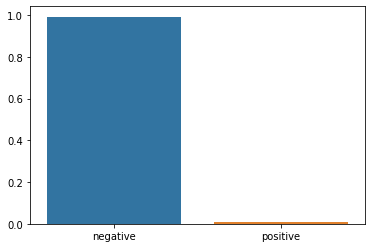

In [7]:
sequence = "I hate eating vegetables. They taste so odd."
candidate_labels = ["positive", "negative"]

result = classifier(sequence, candidate_labels)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

#### **Classification as Natural Language Inference (NLI) for two sequences**

The underlying model is trained on the task of Natural Language Inference (NLI), which takes in two sequences and determines whether they contradict each other, entail each other, or neither.

This can be adapted to the task of zero-shot classification by treating the sequence which we want to classify as one NLI sequence (called the premise) and turning a candidate label into the other (the hypothesis). If the model predicts that the constructed premise _entails_ the hypothesis, then we can take that as a prediction that the label applies to the text. Check out [this blog post](https://joeddav.github.io/blog/2020/05/29/ZSL.html) for a more detailed explanation.

By default, the pipeline turns labels into hypotheses with the template `This example is {class_name}.`. This works well in many settings, but you can also customize this for your specific setting. Let's add another review to our above sentiment classification example that's a bit more challenging:

Sequence 1:  I hated this movie. The acting sucked.
Sequence 2:  This movie didn't quite live up to my high expectations, but overall it was okay.


Text(0.5, 0, 'Sequence 2')

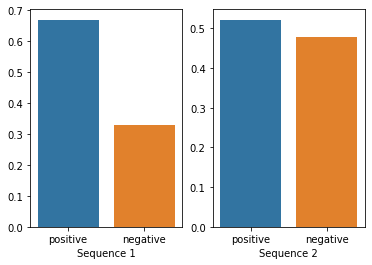

In [8]:
sequences = [
    "I hated this movie. The acting sucked.",
    "This movie didn't quite live up to my high expectations, but overall it was okay."
]
candidate_labels = ["positive", "negative"]

classifier(sequences, candidate_labels)

result0 = classifier(sequence[0], candidate_labels)
score0 = result0['scores']
label0 = result0['labels']
print("Sequence 1: ",sequences[0])

plt.subplot(1, 2, 1);
sns.barplot(x=label0,y=score0)
plt.xlabel('Sequence 1')

result1 = classifier(sequence[1], candidate_labels)
score1 = result1['scores']
label1 = result1['labels']
print("Sequence 2: ",sequences[1])

plt.subplot(1, 2, 2);
sns.barplot(x=label1,y=score1)
plt.xlabel('Sequence 2')

The second example is a bit harder. Over here, we will be using a hypothesis template which is more specific to the setting of review sentiment analysis. Instead of the default, `This example is {}.`, we'll use, `The sentiment of this review is {}.` (where `{}` is replaced with the candidate class name)

> **Hypothesis Template:** A sequence that helps leverage the sentiment of the overall input.

Sequence 1:  I hated this movie. The acting sucked.
Sequence 2:  This movie didn't quite live up to my high expectations, but overall it was okay.


Text(0.5, 0, 'Sequence 2')

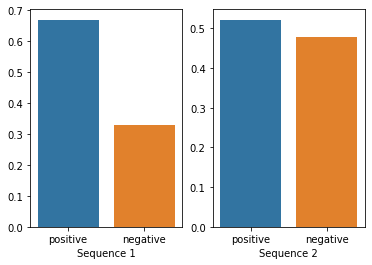

In [9]:
sequences = [
    "I hated this movie. The acting sucked.",
    "This movie didn't quite live up to my high expectations, but overall it was okay."
]
candidate_labels = ["positive", "negative"]
hypothesis_template = "The sentiment of this review is {}."

classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)

result0 = classifier(sequence[0], candidate_labels)
score0 = result0['scores']
label0 = result0['labels']
print("Sequence 1: ",sequences[0])

plt.subplot(1, 2, 1);
sns.barplot(x=label0,y=score0)
plt.xlabel('Sequence 1')

result1 = classifier(sequence[1], candidate_labels)
score1 = result1['scores']
label1 = result1['labels']
print("Sequence 2: ",sequences[1])

plt.subplot(1, 2, 2);
sns.barplot(x=label1,y=score1)
plt.xlabel('Sequence 2')

By providing a more precise hypothesis template, we are able to see a more accurate classification of the second review.



#### **Text classification in 100 languages**

In this model, a total of one hundred languages have been pre-trained and fed to help with multi-class classification of the sequence.

We can use the instruction `model='joeddav/xlm-roberta-large-xnli'` to use the model for the pipeline.

In [10]:
classifier = pipeline("zero-shot-classification", model='joeddav/xlm-roberta-large-xnli')

**Using a Russian Sentence as an Input and English Words as Labels**

За кого вы голосуете в 2020 году?


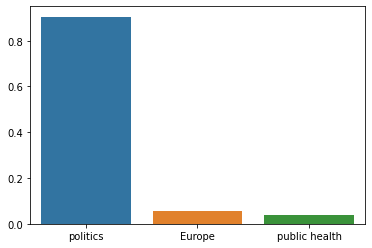

In [11]:
sequence = "За кого вы голосуете в 2020 году?" # translation: "Who are you voting for in 2020?"
candidate_labels = ["Europe", "public health", "politics"]

result = classifier(sequence, candidate_labels)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

**Using a Russian Sentence as Input and French Words as Labels**

За кого вы голосуете в 2020 году?


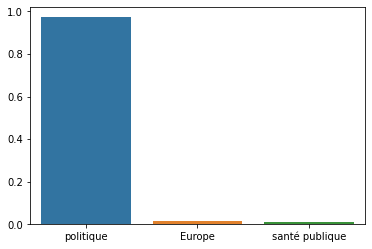

In [12]:
sequence = "За кого вы голосуете в 2020 году?" # translation: "Who are you voting for in 2020?"
candidate_labels = ["Europe", "santé publique", "politique"]

result = classifier(sequence, candidate_labels)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

**Using a Spanish Sentence as Input and Spanish Words as Labels**

While using a hypothesis template, it may be worthwhile to consider that if we are strictly working with one language, we might want to convert the `hypothesis_template` to that language as well.

¿A quién vas a votar en 2020?


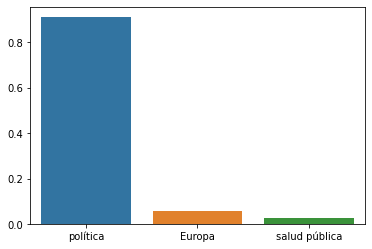

In [13]:
sequence = "¿A quién vas a votar en 2020?"
candidate_labels = ["Europa", "salud pública", "política"]
hypothesis_template = "Este ejemplo es {}."

result = classifier(sequence, candidate_labels, hypothesis_template=hypothesis_template)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

**Using a Hindi Sentence as Input and English Words as Labels**

आप 2020 में किसे वोट कर रहे हैं?


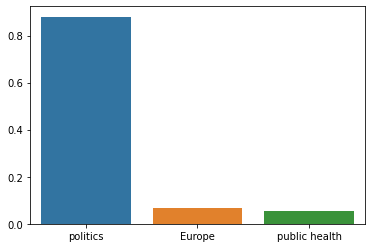

In [14]:
sequence = "आप 2020 में किसे वोट कर रहे हैं?" # translation: "Who are you voting for in 2020?"
candidate_labels = ["Europe", "public health", "politics"]

result = classifier(sequence, candidate_labels)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

The model is fine-tuned on XNLI which includes 15 languages: Arabic, Bulgarian, Chinese, English, French, German, Greek, Hindi, Russian, Spanish, Swahili, Thai, Turkish, Urdu, and Vietnamese. The base model is trained on 85 more, so the model will work to some degree for any of those in the XLM RoBERTa training corpus (see the full list in appendix A of the [XLM Roberata paper](https://arxiv.org/abs/1911.02116)).

See the [model page](https://huggingface.co/joeddav/xlm-roberta-large-xnli) for more.

#### **Using an Internet Source (Yahoo! Answers)**

Yahoo! Answers is a community-driven question-and-answer website, or knowledge market, from Yahoo! that allows users to submit questions and answer questions from other users.

We use the model `joeddav/bart-large-mnli-yahoo-answers`

In [15]:
classifier = pipeline("zero-shot-classification", model='joeddav/bart-large-mnli-yahoo-answers')

This text is about politics


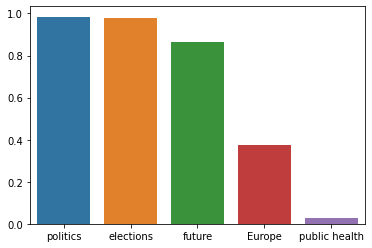

In [16]:
sequence = "Who are you voting for in 2020?"
candidate_labels = ["Europe", "public health", "politics", "elections","future"]

hypothesis_template = "This text is about {}."
result = classifier(sequence, candidate_labels, multi_class=True, hypothesis_template=hypothesis_template)
score = result['scores']
label = result['labels']

sns.barplot(x=label,y=score)

print("This text is about",label[0])

#### **Using an Internet Source (Rotten Tomatoes)**

Using the popular movie rating platform Rotten Tomatoes, we can understand and rate the sentiment of the movies.

In [17]:
classifier = pipeline("zero-shot-classification", model='textattack/distilbert-base-uncased-rotten-tomatoes')

Toy Story is such a good movie.


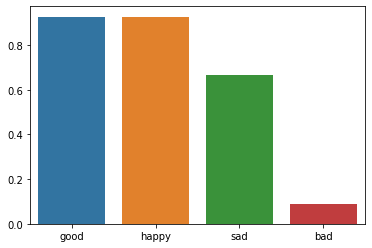

In [18]:
sequence = "Toy Story is such a good movie."
candidate_labels = ["good", "bad", "happy", "sad"]

result = classifier(sequence, candidate_labels, multi_class=True)
score = result['scores']
label = result['labels']
print(sequence)
sns.barplot(x=label,y=score)

## Conclusion

Zero-shot learning is being able to solve a task despite not having received any training examples of that task.